# WELCOME TO CLASSIFICATION NOTEBOOK

## Simple classifiers

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn import datasets, linear_model

In [ ]:
# Load the wine dataset 
dataset = datasets.load_wine()

In [ ]:
print(dataset['DESCR'])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [ ]:
set(dataset['target'])

{0, 1, 2}

### Binary classifier

In [ ]:
# Prepare the data
y = (dataset['target'] == 1)*1 
X = dataset['data']

In [ ]:
# Split the data
from sklearn import model_selection
RAND_STATE = 1234

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25, random_state=RAND_STATE)


Text(0, 0.5, 'Frequency')

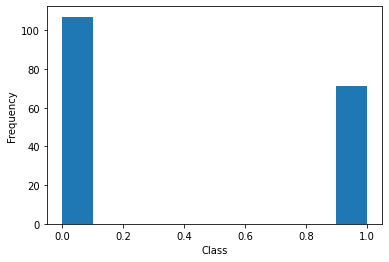

In [ ]:
# Understand the data

# Number of samples in each class
_ = plt.hist(y)
plt.xlabel('Class')
plt.ylabel('Frequency')

In [ ]:
df_X = pd.DataFrame(X_train,columns = dataset['feature_names'])
df_y = pd.DataFrame(y_train,columns=['Target'])
df = pd.concat([df_X, df_y], axis=1)

In [ ]:
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Target
0,12.29,2.83,2.22,18.0,88.0,2.45,2.25,0.25,1.99,2.15,1.15,3.30,290.0,1
1,14.12,1.48,2.32,16.8,95.0,2.20,2.43,0.26,1.57,5.00,1.17,2.82,1280.0,0
2,13.23,3.30,2.28,18.5,98.0,1.80,0.83,0.61,1.87,10.52,0.56,1.51,675.0,0
3,11.96,1.09,2.30,21.0,101.0,3.38,2.14,0.13,1.65,3.21,0.99,3.13,886.0,1
4,12.85,3.27,2.58,22.0,106.0,1.65,0.60,0.60,0.96,5.58,0.87,2.11,570.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,13.11,1.90,2.75,25.5,116.0,2.20,1.28,0.26,1.56,7.10,0.61,1.33,425.0,0
129,11.82,1.47,1.99,20.8,86.0,1.98,1.60,0.30,1.53,1.95,0.95,3.33,495.0,1
130,13.77,1.90,2.68,17.1,115.0,3.00,2.79,0.39,1.68,6.30,1.13,2.93,1375.0,0
131,13.07,1.50,2.10,15.5,98.0,2.40,2.64,0.28,1.37,3.70,1.18,2.69,1020.0,0


In [ ]:
# Preprocess the data
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

In [ ]:
# Train the model
model = linear_model.LogisticRegression(penalty='l2')
model.fit(X_train_scaled,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Make predictions
model.predict(scaler.transform(X_test))

array([1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1])

In [ ]:
# Interpret the results
print(model.intercept_)
print(model.coef_)

[-1.58917803]
[[-1.45701099 -0.81255833 -0.87116652  0.64651768 -0.04832776  0.03278073
   0.25999405  0.2592532   0.18032925 -1.90580958  1.00356092  0.12483151
  -1.6647994 ]]


### Multi-class classifier

In [ ]:
# Prepare the data
y = dataset['target']
X = dataset['data']

In [ ]:
# Split the data
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.4, random_state=RAND_STATE)
for train_index, test_index in sss.split(X,y):
  X_train, X_test = X[train_index],X[test_index]
  y_train, y_test = y[train_index],y[test_index]

In [ ]:
# Preprocess the data
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

In [ ]:
# Train the model
model = linear_model.LogisticRegression(penalty='l2') 
model.fit(X_train_scaled,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Make predictions
model.predict(scaler.transform(X_test))

array([1, 2, 0, 0, 1, 1, 1, 1, 0, 2, 0, 1, 1, 2, 1, 2, 2, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 2, 0, 2, 2, 1, 0, 1, 1, 1, 1, 2, 0, 2, 0,
       0, 0, 2, 2, 0, 0, 1, 1, 2, 0, 1, 2, 1, 1, 0, 2, 2, 0, 1, 0, 2, 0,
       0, 2, 0, 2, 2, 0])

In [ ]:
model.predict_proba(scaler.transform(X_test))

array([[9.34851559e-02, 9.06244438e-01, 2.70406230e-04],
       [5.68704609e-03, 6.01213682e-02, 9.34191586e-01],
       [9.98746180e-01, 1.17402969e-03, 7.97906351e-05],
       [9.73099656e-01, 2.11009133e-02, 5.79943120e-03],
       [2.98715336e-01, 6.95369113e-01, 5.91555110e-03],
       [2.68583744e-02, 9.69771960e-01, 3.36966548e-03],
       [5.41627743e-02, 9.36994279e-01, 8.84294697e-03],
       [1.71254044e-04, 9.99357768e-01, 4.70977655e-04],
       [9.85712382e-01, 1.37464304e-02, 5.41188016e-04],
       [1.37418155e-03, 1.94937560e-03, 9.96676443e-01],
       [9.93008871e-01, 6.22390898e-03, 7.67220445e-04],
       [5.15306301e-03, 9.94732085e-01, 1.14851966e-04],
       [6.87068704e-04, 9.98944221e-01, 3.68710645e-04],
       [1.54317046e-03, 3.35412277e-02, 9.64915602e-01],
       [5.78734319e-04, 9.98724216e-01, 6.97049561e-04],
       [7.35428687e-04, 4.01370932e-02, 9.59127478e-01],
       [1.51712762e-03, 9.58562957e-04, 9.97524309e-01],
       [5.44583361e-01, 4.53339

**Challenge**: Make the prediction class from the predicted probability.

In [ ]:
# Interpret the results
print(model.intercept_)
print(model.coef_)

[ 0.10652283  0.66974124 -0.77626407]
[[ 0.67844247  0.14493702  0.23404345 -0.4159565   0.31850714  0.37752148
   0.57626686 -0.24235122  0.14351622  0.20594288  0.16918513  0.66699586
   0.97514837]
 [-0.65522488 -0.30642279 -0.68235369  0.27318547 -0.42245716 -0.17963612
   0.38792954  0.23992053  0.11652933 -0.95434024  0.64938029  0.02084025
  -0.93055833]
 [-0.02321759  0.16148577  0.44831024  0.14277103  0.10395002 -0.19788535
  -0.96419641  0.00243069 -0.26004555  0.74839736 -0.81856541 -0.68783611
  -0.04459004]]


## Evaluation metrics

In [ ]:
from sklearn import metrics 

In [ ]:
# Multi-class classification
y_test_pred = model.predict(scaler.transform(X_test))
y_test_pred

array([1, 2, 0, 0, 1, 1, 1, 1, 0, 2, 0, 1, 1, 2, 1, 2, 2, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 2, 0, 2, 2, 1, 0, 1, 1, 1, 1, 2, 0, 2, 0,
       0, 0, 2, 2, 0, 0, 1, 1, 2, 0, 1, 2, 1, 1, 0, 2, 2, 0, 1, 0, 2, 0,
       0, 2, 0, 2, 2, 0])

In [ ]:
# Accuracy
metrics.accuracy_score(y_test,y_test_pred)

0.9444444444444444

In [ ]:
# Confusion matrix
metrics.confusion_matrix(y_test,y_test_pred)

array([[24,  0,  0],
       [ 3, 25,  1],
       [ 0,  0, 19]])

In [ ]:
# Precision, recall, f1, support
metrics.precision_recall_fscore_support(y_test, y_test_pred)

(array([0.88888889, 1.        , 0.95      ]),
 array([1.        , 0.86206897, 1.        ]),
 array([0.94117647, 0.92592593, 0.97435897]),
 array([24, 29, 19]))

Text(0, 0.5, 'Precision')

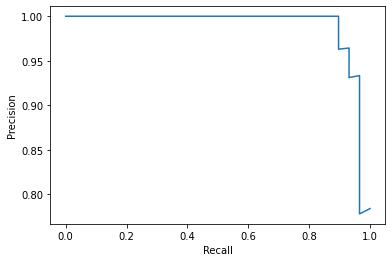

In [ ]:
# Precision-recall curve
y_test_pred_prob = model.predict_proba(scaler.transform(X_test))
precisions, recalls, thresholds = metrics.precision_recall_curve(y_test==1,y_test_pred_prob[:,1])
plt.plot(recalls,precisions)
plt.xlabel('Recall')
plt.ylabel('Precision')

Text(0, 0.5, 'TPR')

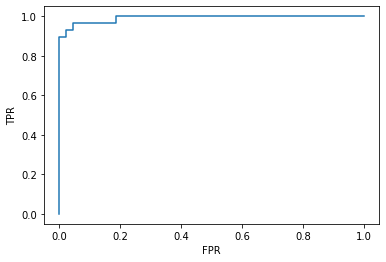

In [ ]:
# ROC curve
auc = metrics.roc_auc_score(y_test==1,y_test_pred_prob[:,1])
fpr,tpr,thresholds = metrics.roc_curve(y_test==1,y_test_pred_prob[:,1])
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')

**Challenge**: For your understanding, try to implement the precision-recall curve and the ROC curve by yourself.